### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
df = pd.read_csv('water_potability.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Exploratory Data Analysis

<Axes: >

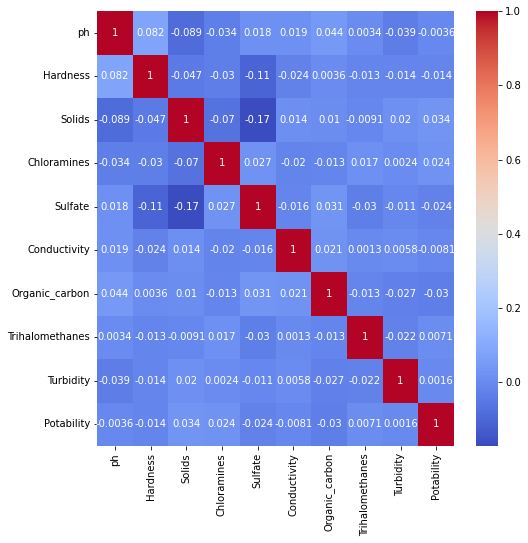

In [7]:
plt.figure(figsize = (8, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

In [8]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


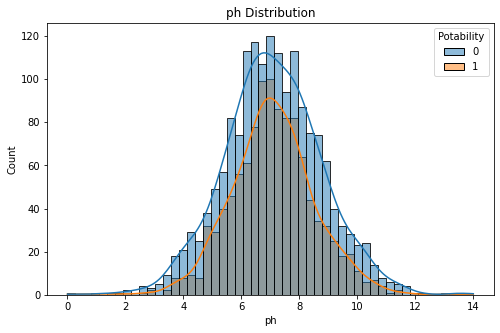

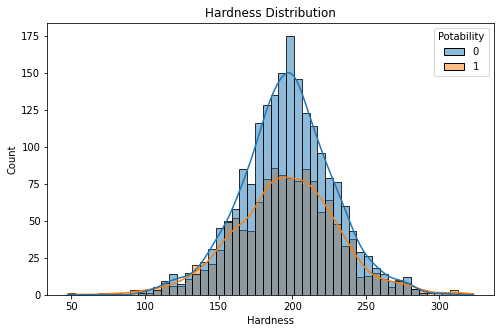

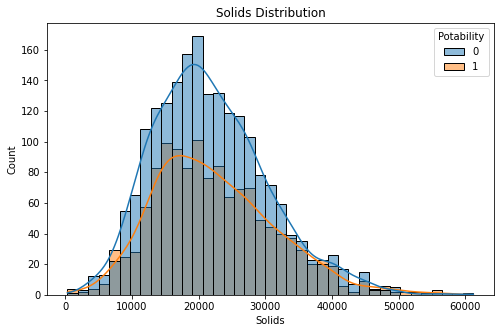

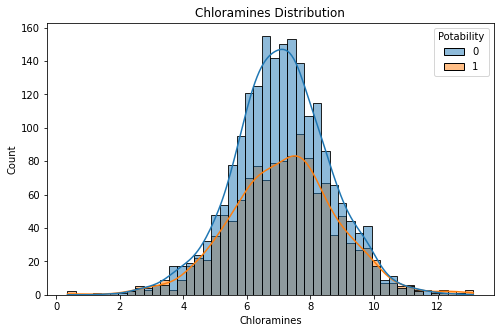

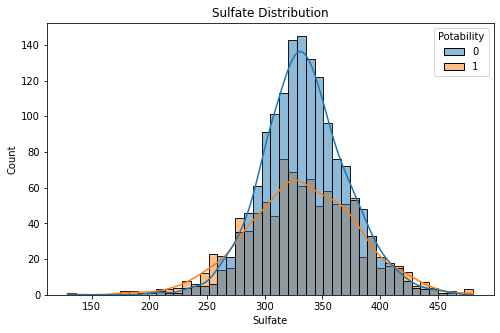

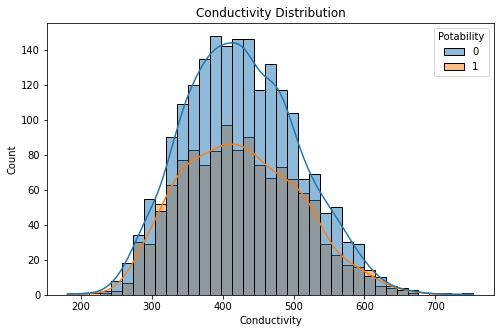

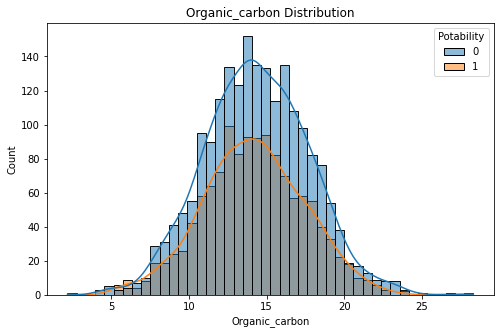

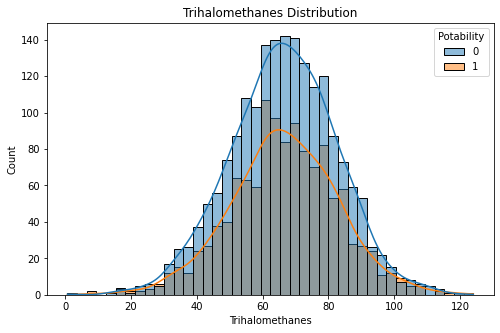

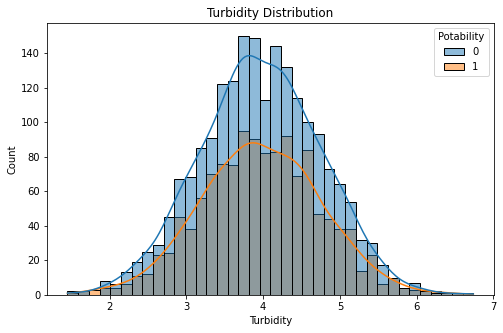

In [9]:
cols = list(df.columns)
cols.remove('Potability')

for col in cols:
    plt.figure(figsize = (8, 5))
    plt.title(f'{col} Distribution')
    sns.histplot(df, x = col, hue = 'Potability', kde = True)

<Axes: title={'center': 'No. of Potable Samples'}, xlabel='Potability', ylabel='count'>

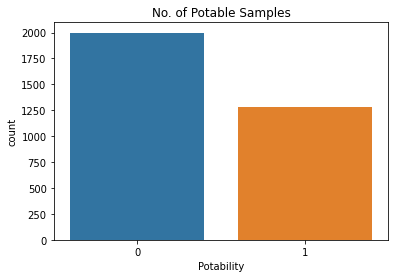

In [10]:
plt.title('No. of Potable Samples')
sns.countplot(df, x = 'Potability')

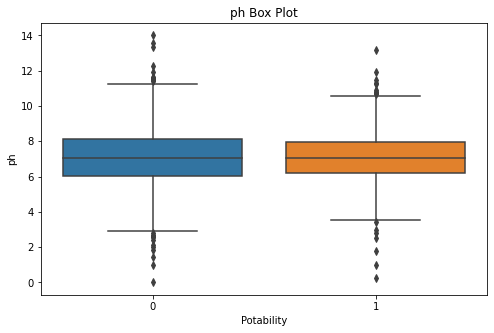

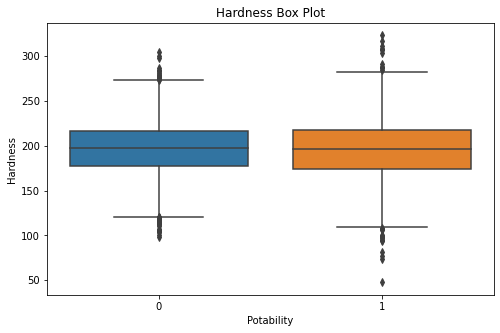

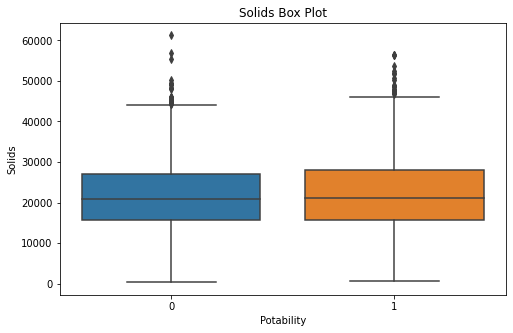

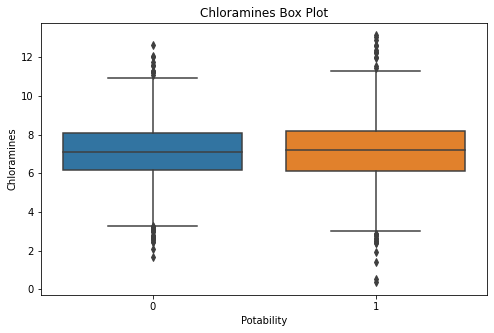

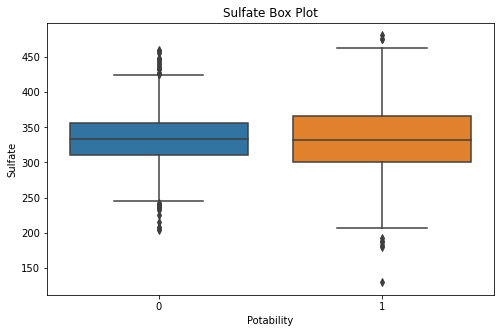

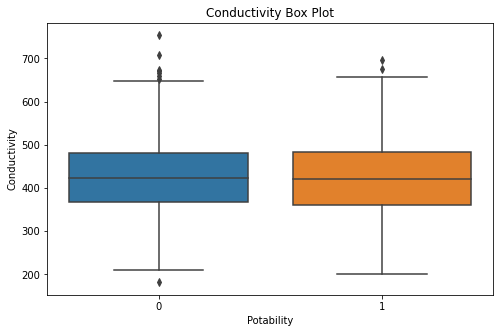

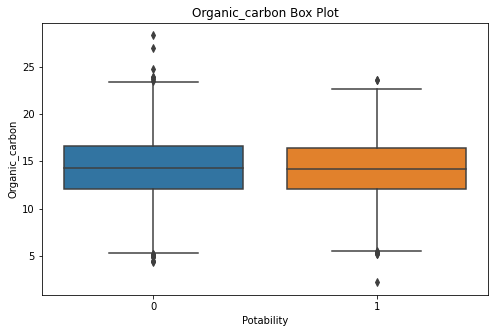

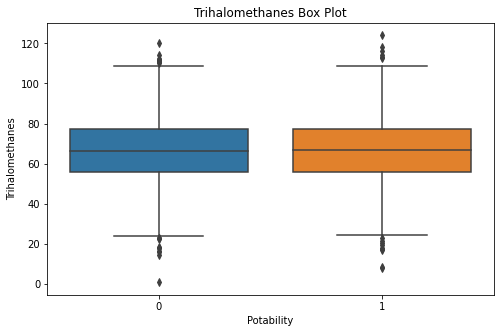

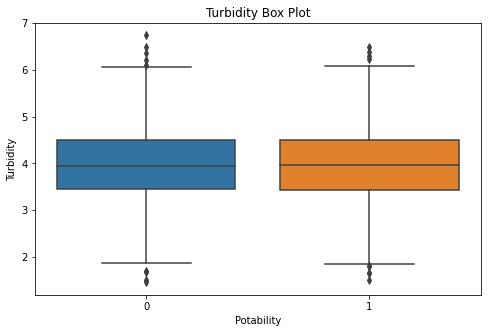

In [11]:
for col in cols:
    plt.figure(figsize = (8, 5))
    plt.title(f'{col} Box Plot')
    sns.boxplot(df, x = 'Potability', y = col)

### Data Preprocessing

In [12]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [14]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [15]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


In [16]:
ph_mean_potable = df[df['Potability'] == 1]['ph'].mean()
ph_mean_potable

7.0737832953812

In [17]:
ph_mean_non_potable = df[df['Potability'] == 0]['ph'].mean()
ph_mean_non_potable

7.085378435983544

In [18]:
def fill_na_ph_by_potability(x):
    if np.isnan(x['ph']):
        if x['Potability'] == 1:
            return ph_mean_potable
        return ph_mean_non_potable
    return x['ph']

In [19]:
df['ph'] = df.apply(fill_na_ph_by_potability, axis = 1)

In [20]:
df['ph'].value_counts().sort_values()

7.539287      1
8.858402      1
7.974522      1
8.099124      1
8.316766      1
           ... 
6.069616      1
4.668102      1
6.923636      1
7.073783    177
7.085378    314
Name: ph, Length: 2787, dtype: int64

In [21]:
df.isnull().sum()

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [22]:
sulfate_median_potable = df[df['Potability'] == 1]['Sulfate'].median()
sulfate_median_potable

331.8381671295742

In [23]:
sulfate_median_non_potable = df[df['Potability'] == 0]['Sulfate'].median()
sulfate_median_non_potable

333.38942610169323

In [24]:
df[df['Potability'] == 1]['Sulfate'].value_counts().sort_values()

310.583374    1
389.889271    1
259.979966    1
187.170714    1
287.085679    1
             ..
328.886838    1
312.931022    1
304.510230    1
345.700257    1
359.948574    1
Name: Sulfate, Length: 985, dtype: int64

In [25]:
def fill_na_sulfate_by_potability(x):
    if np.isnan(x['Sulfate']):
        if x['Potability'] == 1:
            return sulfate_median_potable
        return sulfate_median_non_potable
    return x['Sulfate']

In [26]:
df['Sulfate'] = df.apply(fill_na_sulfate_by_potability, axis = 1)

In [27]:
df['Sulfate'].value_counts()

333.389426    488
331.838167    294
301.230848      1
391.918229      1
330.905370      1
             ... 
343.620823      1
359.710517      1
389.219586      1
337.231469      1
359.948574      1
Name: Sulfate, Length: 2496, dtype: int64

In [28]:
df.isnull().sum()

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate              0
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [29]:
trihalomethanes_median_potable = df[df['Potability'] == 1]['Trihalomethanes'].median()
trihalomethanes_median_potable

66.6782137100115

In [30]:
trihalomethanes_median_non_potable = df[df['Potability'] == 0]['Trihalomethanes'].median()
trihalomethanes_median_non_potable

66.54219804427565

In [31]:
def fill_na_trihalomethanes_by_potability(x):
    if np.isnan(x['Trihalomethanes']):
        if x['Potability'] == 1:
            return trihalomethanes_median_potable
        return trihalomethanes_median_non_potable
    return x['Trihalomethanes']

In [32]:
df['Trihalomethanes'] = df.apply(fill_na_trihalomethanes_by_potability, axis = 1)

In [33]:
df['Trihalomethanes'].value_counts().sort_values()

47.935105      1
79.847843      1
56.931906      1
90.181676      1
76.485911      1
            ... 
60.419921      1
66.687695      1
59.489294      1
66.678214     56
66.542198    108
Name: Trihalomethanes, Length: 3114, dtype: int64

In [34]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### Modeling and Train-Test Splitting

In [35]:
X = df.drop('Potability', axis = 1)
y = df['Potability']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 40)

In [37]:
def automate_model_train_test_display_results(models: list, X_train, y_train, X_test, y_test):
    for model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        print(confusion_matrix(y_test, predictions))
        print(classification_report(y_test, predictions))
        print("\n")

In [38]:
models = [SVC(), DecisionTreeClassifier(), RandomForestClassifier()]
automate_model_train_test_display_results(
    models = models,
    X_train = X_train,
    y_train = y_train,
    X_test = X_test,
    y_test = y_test
)

[[492   0]
 [327   0]]
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       492
           1       0.00      0.00      0.00       327

    accuracy                           0.60       819
   macro avg       0.30      0.50      0.38       819
weighted avg       0.36      0.60      0.45       819



[[371 121]
 [ 99 228]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       492
           1       0.65      0.70      0.67       327

    accuracy                           0.73       819
   macro avg       0.72      0.73      0.72       819
weighted avg       0.74      0.73      0.73       819





/usr/local/Caskroom/miniforge/base/envs/ml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/Caskroom/miniforge/base/envs/ml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/Caskroom/miniforge/base/envs/ml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

[[442  50]
 [118 209]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       492
           1       0.81      0.64      0.71       327

    accuracy                           0.79       819
   macro avg       0.80      0.77      0.78       819
weighted avg       0.80      0.79      0.79       819





### With Scaling

In [39]:
scaler = StandardScaler()

In [40]:
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.58221941,  0.02146382, -1.28817533, ...,  0.56713064,
         0.54463818, -1.24582547],
       [ 1.11068321,  0.52353197, -0.36844412, ...,  1.71680475,
         1.94616281,  0.76209073],
       [ 0.04033293, -0.29587607, -0.29578684, ...,  0.38884913,
         0.49834274, -1.77598649],
       ...,
       [-0.51941438,  1.59895704, -0.12047469, ...,  0.22143318,
        -0.84669428,  0.32334392],
       [ 1.55155025, -0.91171149,  1.17684393, ..., -0.47382512,
        -0.59153366,  0.76299763],
       [-0.37982422,  0.06738592, -0.05460223, ..., -1.55833655,
         0.03009586,  1.85852632]])

In [41]:
X_test = scaler.transform(X_test)
X_test

array([[-1.63767538e-03,  1.23518932e+00,  1.51327490e+00, ...,
        -2.70899639e-01, -2.08064754e+00, -1.80573998e-01],
       [ 1.45421687e-01, -6.62785468e-01,  1.34946330e+00, ...,
         5.84096239e-01,  9.95989896e-01,  6.36382306e-01],
       [ 6.17138132e-03, -8.77866052e-01, -1.32037310e-01, ...,
        -9.13729998e-01,  3.00958591e-02, -3.66838971e-01],
       ...,
       [-3.32327579e-01,  6.92534445e-01, -1.65668223e-02, ...,
         2.48315568e-01,  1.85665705e-01, -3.80751124e-01],
       [ 6.17138132e-03,  2.77933455e-01, -1.93092790e-01, ...,
        -6.06936264e-01,  2.87601764e-01,  1.71957557e-01],
       [-5.38065834e-01, -1.45996322e+00,  9.18793259e-02, ...,
        -1.42998117e+00, -2.70009449e-01, -4.43915969e-01]])

In [42]:
models = [SVC(), DecisionTreeClassifier(), RandomForestClassifier()]
automate_model_train_test_display_results(
    models = models,
    X_train = X_train,
    y_train = y_train,
    X_test = X_test,
    y_test = y_test
)

[[461  31]
 [238  89]]
              precision    recall  f1-score   support

           0       0.66      0.94      0.77       492
           1       0.74      0.27      0.40       327

    accuracy                           0.67       819
   macro avg       0.70      0.60      0.59       819
weighted avg       0.69      0.67      0.62       819



[[373 119]
 [ 95 232]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       492
           1       0.66      0.71      0.68       327

    accuracy                           0.74       819
   macro avg       0.73      0.73      0.73       819
weighted avg       0.74      0.74      0.74       819



[[440  52]
 [120 207]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       492
           1       0.80      0.63      0.71       327

    accuracy                           0.79       819
   macro avg       0.79      0.76      0.77       819
w